<h1>SC1015 Mini Project</h1>

<h2>Part 4: Model Prediction, Data-Driven Insights & Recommendations</h2>

The `XG Boost` classifier was evaluated to be the best machine learning model in distinguishing between patients with heart disease and patients without. But how well does it perform on unseen data? We need to run it by our Train and Test sets to ensure that the model isn't overfitting and can perform just as well on unknown samples.

And to conclude, what are some of the data-driven insights that can be derived from the entire journey that can help us answer our problem statement? And what kind of recommendations can be made such that we can branch out into more sophisticated problems revolving around heart disease that can help us uncover more intuitive and deeper insights using our dataset and models? These are the questions that will be answered in this final stage of the workflow.

In [ ]:
# load previous session
import dill
dill.load_session('notebook_env.db')

<h3>Model Prediction w/ XG Boost</h3>

Now, we will evaluate the XG Boost model on both the Train and Test sets.

Train Set


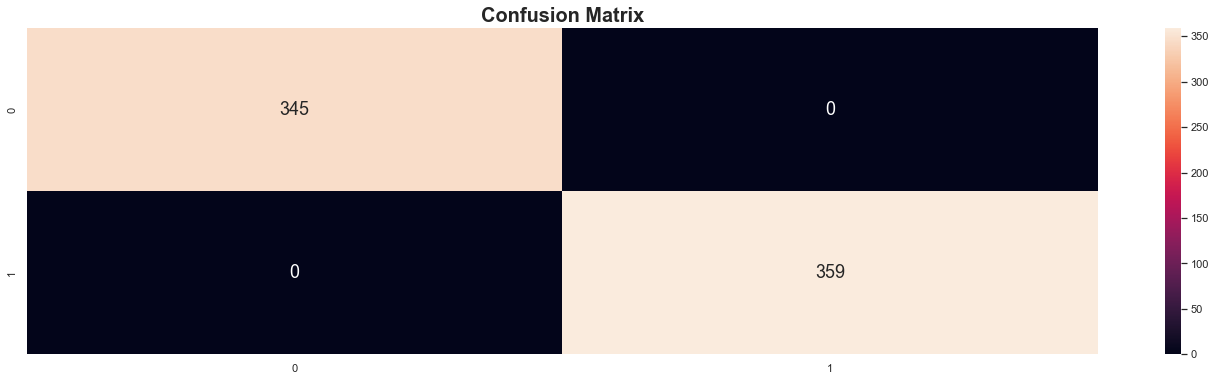

Recall	: 1.000
FPR	: 0.000
Classification Accuracy	: 1.000


In [137]:
print("Train Set")
classifier_eval(X_train, y_train, gs_xg)

On the train set, the XG Boost classifier has perfect scores for all three evaluation metrics. Is this problematic?

<b>Overfitting</b> is when the model fits to the training data too well and thereby is unable to work out the pattern between the features in predicting the response variable, impeding its predictive quality and ability to make accurate predictions on unseen data.

We can ask ourselves then, is our classifier overfitting to the train data? To determine this, we need to evaluate the XG Boost classifier model against the Test set as well, which consists of unknown samples the classifier has not been trained on.

Test Set


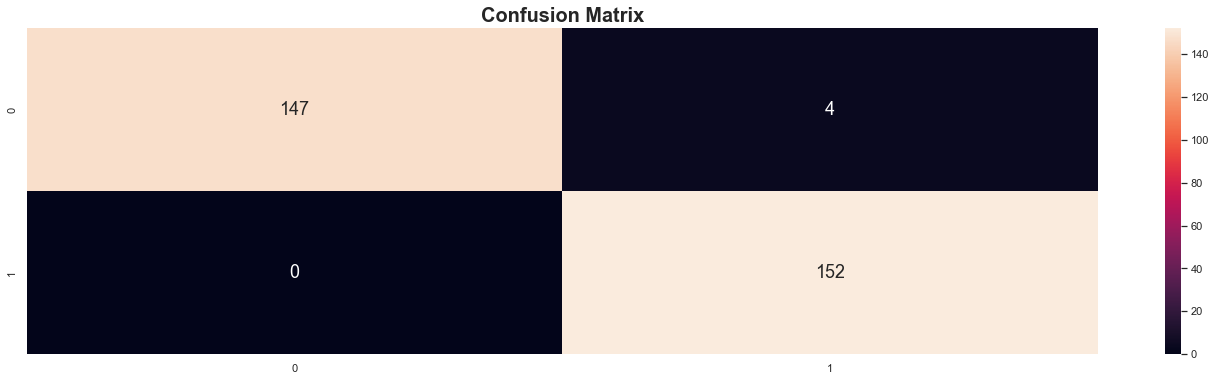

Recall	: 1.000
FPR	: 0.026
Classification Accuracy	: 0.987


In [138]:
print("Test Set")
classifier_eval(X_test, y_test, gs_xg)

Surprisingly, the XG Boost classifier model manages to achieve perfect `Recall` even on the Test set, which is an excellent indicator of its ability to make accurate predictions for the positive class, even on unknown samples. In a medical context, this means that the model is able to correctly classify all patients who actually have heart disease, which is exactly what we want. Additionally, the `False Positive Rate` and `Classification Accuracy` are still exceptionally good for performing on unknown samples.

<b>ROC AUC Curve</b>

The <b>Receiver Operator Characteristic (ROC)</b> curve plots the `Recall` against the `FPR` to measure the probability of correct predictions (the performance of the model) for the binary classes at different thresholds. It is usually accompanied by the <b>Area Under the Curve (AUC)</b>, which measures the ability of a binary classifier to distinguish between classes.

Together, the ROC AUC plot is typically used to evaluate the separability of binary classification models, that is, the model's ability to tell the different classes apart. This is based on the model's ability to make more correct predictions (True Positives and True Negatives) than wrong predictions (False Positives and False Negatives).
* The higher the AUC, the better the model in distinguishing between the classes.
    * AUC = 1: The model can 100% confidently tell between the positive and negative classes.
    * 0.5 < AUC < 1: The probability of the model distinguishing between the classes is high.
    * AUC = 0.5: The model can NOT tell the difference between positive and negative classes, and randomly assigns samples to whichever class.
    * AUC = 0: The model has an inverse understanding of the data, and 100% classifies all true positives as false negatives, and all true negatives as false positives.

Ideally, we want AUC to be as close to 1 as possible. We will use the ROC AUC plot to check on the predictive effectiveness of the XG Boost model.

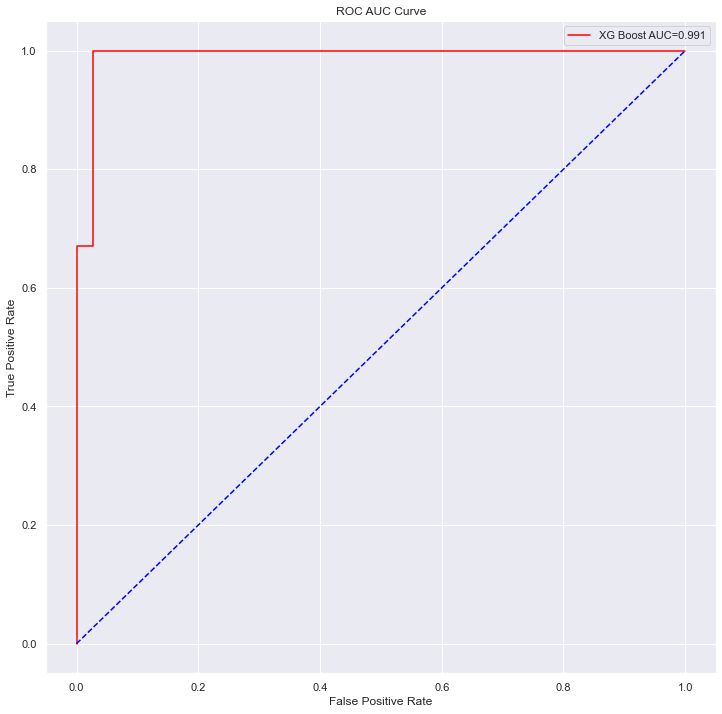

In [307]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for XG Boost
xg_pred_prob = gs_xg.predict_proba(X_test)

# ROC curve
fprxg, tprxg, _ = roc_curve(y_test, xg_pred_prob[:,1])

# AUC score
aucxg = roc_auc_score(y_test, xg_pred_prob[:,1])

# Constructing the ROC AUC plot
f = plt.figure(figsize=(12,12))
plt.plot(fprxg, tprxg, color='red', label=f'XG Boost AUC={aucxg:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue') # ROC curve for TPR = FPR
plt.title("ROC AUC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

Just from the shape of the XG Boost ROC curve alone, one can observe that at most thresholds the classifier is able to distinguish between those with heart disease and those without heart disease exceptionally well. The AUC score of the XG Boost classifier is `0.991`, which is extremely close to the optimal AUC score = 1, and therefore it can be interpreted that the model is near 100% confident in distinguishing between the two classes.

<h2>Data-Driven Insights</h2>

<b>Which feature contributes more to predicting heart disease?</b>

To fight against the prevalence of heart disease, there is a need to find out what exactly factors the most into the development of heart disease in patients. For the XG Boost model, we will extract the feature importances to determine the relevance of features in the model's classification task and grant ourselves an insight into the features that contribute most to predicting heart disease.

Text(0.5, 1.0, 'Feature Importance in Predicting Heart Disease')

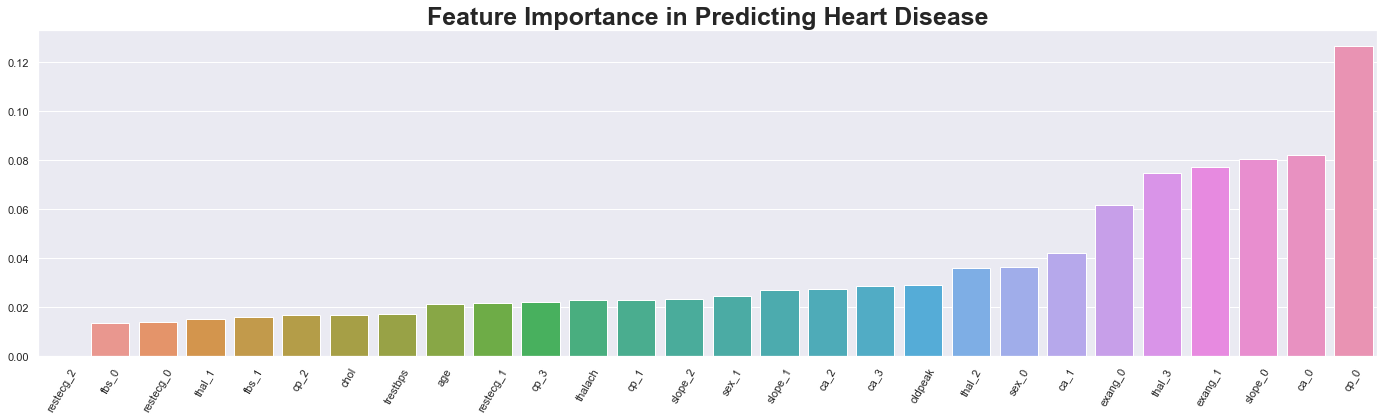

In [290]:
# get importances of features
imptance = gs_xg.best_estimator_.feature_importances_

keys = list(X.columns.values)
FI_dict = dict(zip(keys, imptance))
FI_dict = dict(sorted(FI_dict.items(), key=lambda item: item[1]))
    
# plot feature importances
f = plt.figure(figsize=(24,6))
g = sb.barplot(x=list(FI_dict.keys()), y=list(FI_dict.values()))
g.set_xticklabels(g.get_xticklabels(), rotation=60)
g.set_title('Feature Importance in Predicting Heart Disease', fontdict={'fontsize':25, 'fontweight':'bold'})

From the graph, the following insights can be made:
* `cp_0`: This feature has the highest importance for the model in classifying heart disease. From the bivariate analysis during the EDA stage and the insights from the feature importance plot, it can be said that the classifier can more confidently make predictions based on the insight from `cp_0` that the absence of chest pain strongly implies that a patient has no heart disease.

<img src="./images/cp_0.png" 
     align="center" 
     width="500" />
     
* `ca_0`, `thal_3`, `exang_0` and `exang_1`: These features appear to be equally important for the model, coming only after `cp_0`. Similarly, the insights gained from EDA + the feature importance plot suggests the following:
    * if there are zero major vessels colored by fluoroscopy (`ca_0`) and no exercise-induced anginal pain in individuals (`exang_0`), then the classifier can more confidently classify a patient as having heart disease, as compared to most other features in the dataset
    
<table>
    <tr>
      <td>
      <img src='./images/ca_0.png'width=450>
      </td>
      <td>
      <img src='./images/exang_0.png'width=450>
      </td>
    </tr>
</table>

* 
    * if there is exercise-induced anginal pain in individuals (`exang_1`) or if a patient suffers from thalassemia with a reversible defect i.e., there is normal blood flow despite thalassemia (`thal_3`), then the classifier can more confidently classify a patient as not having heart disease, as compared to most other features in the dataset.
    
<table>
    <tr>
      <td>
      <img src='./images/exang_1.png'width=450>
      </td>
      <td>
      <img src='./images/thal_3.png'width=450>
      </td>
    </tr>
</table>

* `slope_0`: This feature, which implies a downsloping peak ST segment recorded during exercise, is an oddity when compared to the insights gathered from EDA. The feature importance plot suggests that this feature helps the classifier make more confident predictions as compared to most other features in the dataset. However, the bivariate analysis EDA suggests otherwise, as it shows that the classes for the response variable are mostly balanced, implying that `slope = 0` would not be helpful in making distinctions between classes. 
    * While `slope_0` may not be a useful feature on its own, it is possible that the classifier might have derived a meaningful relationship between `slope_0` and some of the other features that helped it to make predictions on the data, which could explain its high feature importance.
    
<img src="./images/slope_0.png" 
     align="center" 
     width="500" />
     
* `restecg_2`: On the contrary, this is the least important feature for the XG Boost classifier in helping it predict heart disease in patients. From the bivariate count plot, this can be attributed to the low frequency of samples for this particular class, which thereby results in the model not being able to make any meaningful relationships between `restecg_2` and the response variable.

<img src="./images/restecg_2.png" 
     align="center" 
     width="500" />

Overall, the observations can be condensed into the following data-driven insights:
* Patients are <u>much more</u> susceptible to heart disease if:
    * more of the heart vessels, which supply blood flow to the heart, are blocked (due to cholesterol build-up in the walls of the vessels),
    * they experience chest pain not only during exercise, but even in a resting state.
* Patients are <u>much less</u> susceptible to heart disease if:
    * there is no prolonged or frequent chest pain in daily life.
    * if chest pain is ONLY experienced during physical activity, then it is less likely to be an indicator of heart-related problems and can be construed to mean more pressure is being put on the heart during exercise, which is normal.
    * for patients with thalessemia, if it is of the reversible defect type, then they are at lower risk of heart disease as there is normal blood flow.

<h2>Recommendations</h2>

<h3>Dataset</h3>

In retrospect, the Heart Disease UCI dataset used for this binary classification task to answer our problem statement may seem outdated, as it dates back to the 1990s. Does this mean that it is irrelevant in today's world? 

This isn't exactly true, since many recent published experiments (as recent as the 2010s) still refer to this dataset! This can be explaind by the dataset's time-resilient properties. In other words, as the dataset contains features pertaining to biological characteristics (e.g., cholesterol level) and since not much has changed in the realm of medical knowledge concerning the characteristics of the human body in relation to heart disease, this dataset still remains relevant today.

However, the dataset is <u>not intuitive</u> enough for the common person. This is because the features of the Heart Disease UCI dataset all pertain to medical lingo e.g., `slope` refers to the peak ST segment during exercise, which is not clearly understood by the common individual who isn't a medical professional.

Therefore, for future implementations of our model, we have two recommendations to make:
1. Feature engineering: creating new features from existing features that are more intuitive and easily understood.
    - For example, from a medical perspective, it could be more intuitive to categorize `age` into age groups.
2. Inclusion of additional features that pertain to lifestyle habits, which may help spin a new perspective on the relation of heart disease to lifestyle habits and make our predictions more communicable to the common person such that they can easily act on it.
    - For example, collecting data on whether someone smokes or not (a binary class) into a new feature `smoking`.
    
<h3>Dimensionality Reduction</h3>

After one-hot encoding, the dataset scales to `29` features. The high dimensionality of the dataset can affect the accuracy of the predictive model and even encourage overfitting, and therefore our recommendation for future implementations of the code is to apply dimensionality reduction techniques such as:
* <b>Principal Component Analysis (PCA)</b>: reduces the dataset from a high-dimensional space to a low-dimensional space by "summarizing" a large set of variables into a smaller variable that effectively "encapsulates" the relationship between multiple variables into one single feature.
* <b>Linear Discriminant Analysis (LDA)</b>: finds linear combinations of features that best separate the classes of the target variable, similar to a clustering algorithm but on the features instead of the data.

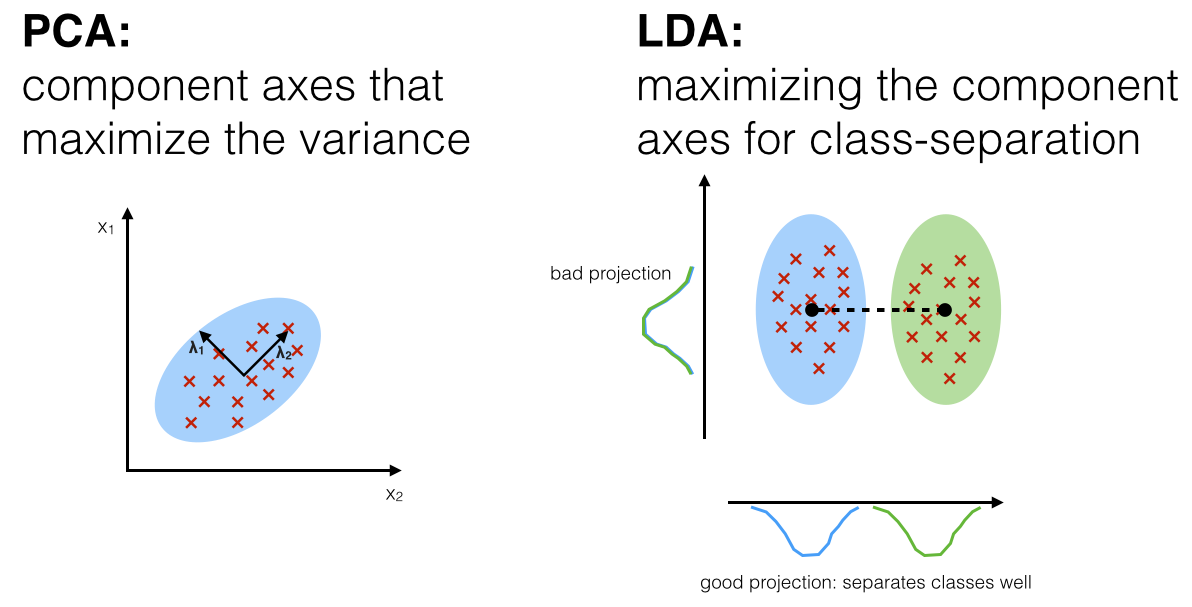

<br>

In [ ]:
# save session
dill.dump_session('notebook_env.db')